# Open data

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from iminuit import Minuit
from scipy import integrate
from scipy import stats

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6) # inches
plt.rcParams['font.size'] = 20
plt.rcParams['figure.dpi'] = 500

In [5]:
columns = ['y1_pt', 'y1_eta', 'y1_phi', 'y1_E', 'y2_pt', 'y2_eta', 'y2_phi', 'y2_E', 'Njets']
for i in range (1,16):
    columns.append( 'jet' + str(i) + '_pt' )
    columns.append( 'jet' + str(i) + '_eta' )
    columns.append( 'jet' + str(i) + '_phi' )
    columns.append( 'jet' + str(i) + '_E' )
    columns.append( 'jet' + str(i) + '_DL1R' )
    
print (columns)

['y1_pt', 'y1_eta', 'y1_phi', 'y1_E', 'y2_pt', 'y2_eta', 'y2_phi', 'y2_E', 'Njets', 'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_E', 'jet1_DL1R', 'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_E', 'jet2_DL1R', 'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_E', 'jet3_DL1R', 'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_E', 'jet4_DL1R', 'jet5_pt', 'jet5_eta', 'jet5_phi', 'jet5_E', 'jet5_DL1R', 'jet6_pt', 'jet6_eta', 'jet6_phi', 'jet6_E', 'jet6_DL1R', 'jet7_pt', 'jet7_eta', 'jet7_phi', 'jet7_E', 'jet7_DL1R', 'jet8_pt', 'jet8_eta', 'jet8_phi', 'jet8_E', 'jet8_DL1R', 'jet9_pt', 'jet9_eta', 'jet9_phi', 'jet9_E', 'jet9_DL1R', 'jet10_pt', 'jet10_eta', 'jet10_phi', 'jet10_E', 'jet10_DL1R', 'jet11_pt', 'jet11_eta', 'jet11_phi', 'jet11_E', 'jet11_DL1R', 'jet12_pt', 'jet12_eta', 'jet12_phi', 'jet12_E', 'jet12_DL1R', 'jet13_pt', 'jet13_eta', 'jet13_phi', 'jet13_E', 'jet13_DL1R', 'jet14_pt', 'jet14_eta', 'jet14_phi', 'jet14_E', 'jet14_DL1R', 'jet15_pt', 'jet15_eta', 'jet15_phi', 'jet15_E', 'jet15_DL1R']


In [6]:
data = pd.read_csv('tH_gamgambWqq.csv', header = None, names = columns)

In [7]:
data.head()

,y1_pt,y1_eta,y1_phi,y1_E,y2_pt,y2_eta,y2_phi,y2_E,Njets,jet1_pt,...,jet14_pt,jet14_eta,jet14_phi,jet14_E,jet14_DL1R,jet15_pt,jet15_eta,jet15_phi,jet15_E,jet15_DL1R
0,390375.0,-0.547024,0.022353,450253.0,88331.8,-1.196040,-0.110091,159411.0,4,244599.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,88909.4,-1.707230,1.613110,253171.0,36525.8,-0.128228,2.990240,36826.5,4,113569.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,236877.0,1.705330,-0.967860,673312.0,42001.2,0.576428,-1.403090,49174.4,5,123003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,168441.0,-1.783590,1.083770,515366.0,46945.1,-1.366870,2.594060,98066.9,3,88992.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,384296.0,0.165686,0.932733,389583.0,281261.0,-0.092400,0.652804,282462.0,5,337068.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data = data.drop(data.columns[np.arange(8, 84)], axis=1)

In [9]:
data

,y1_pt,y1_eta,y1_phi,y1_E,y2_pt,y2_eta,y2_phi,y2_E
0,390375.0,-0.547024,0.022353,450253.0,88331.8,-1.196040,-0.110091,159411.0
1,88909.4,-1.707230,1.613110,253171.0,36525.8,-0.128228,2.990240,36826.5
2,236877.0,1.705330,-0.967860,673312.0,42001.2,0.576428,-1.403090,49174.4
3,168441.0,-1.783590,1.083770,515366.0,46945.1,-1.366870,2.594060,98066.9
4,384296.0,0.165686,0.932733,389583.0,281261.0,-0.092400,0.652804,282462.0
...,...,...,...,...,...,...,...,...
111305,126436.0,-0.646720,-1.864920,153811.0,31523.1,-0.998545,1.815580,48588.8
111306,101824.0,0.235308,0.018492,104656.0,50372.3,-0.009167,-2.157660,50374.4
111307,72512.1,0.265093,-2.506930,75074.9,68986.0,1.779620,-1.822220,210279.0
111308,125397.0,1.746290,1.189130,370404.0,58541.7,1.572810,-0.466225,147164.0


# Make plots of photon variables

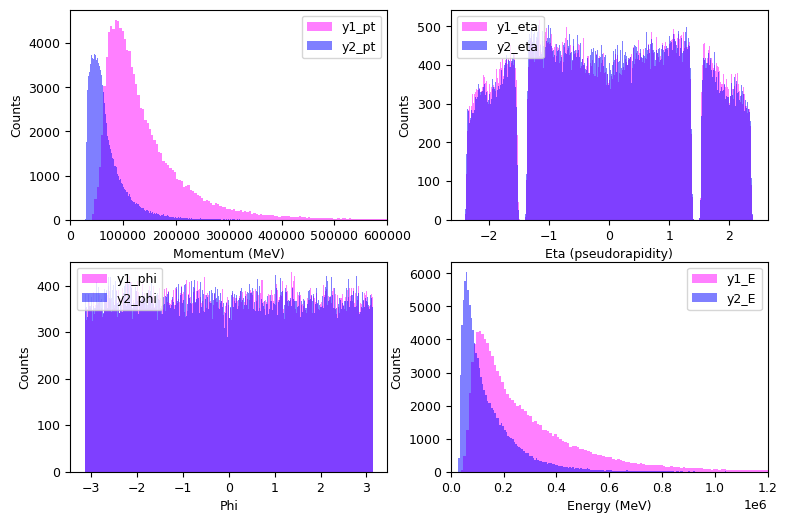

In [8]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(data['y1_pt'], bins = 300, color = 'magenta', alpha = 0.5, label = 'y1_pt')
axs[0, 0].hist(data['y2_pt'], bins = 300, color = 'blue', alpha = 0.5, label = 'y2_pt');
axs[0,0].set_xlabel('Momentum (MeV)')
axs[0,0].set_ylabel('Counts')
axs[0,0].set_xlim(0, 0.6e6)
axs[0,0].legend()

axs[0, 1].hist(data['y1_eta'], bins = 300, color = 'magenta', alpha = 0.5, label = 'y1_eta')
axs[0, 1].hist(data['y2_eta'], bins = 300, color = 'blue', alpha = 0.5, label = 'y2_eta');
axs[0,1].set_xlabel('Eta (pseudorapidity)')
axs[0,1].set_ylabel('Counts')
axs[0,1].legend()

axs[1, 0].hist(data['y1_phi'], bins = 300, color = 'magenta', alpha = 0.5, label = 'y1_phi')
axs[1, 0].hist(data['y2_phi'], bins = 300, color = 'blue', alpha = 0.5, label = 'y2_phi');
axs[1,0].set_xlabel('Phi')
axs[1,0].set_ylabel('Counts')
axs[1,0].legend()

axs[1, 1].hist(data['y1_E'], bins = 300, color = 'magenta', alpha = 0.5, label = 'y1_E')
axs[1, 1].hist(data['y2_E'], bins = 300, color = 'blue', alpha = 0.5, label = 'y2_E');
axs[1,1].set_xlabel('Energy (MeV)')
axs[1,1].set_ylabel('Counts')
axs[1,1].set_xlim(0, 1.2e6)
axs[1,1].legend();

# 4 mom and plot yy mass dist.

In [10]:
def fomy(x, num):
    
    string = 'y' + str(num) + '_'
    E = x[string + 'E']
    px = abs(x[string + 'pt']) * np.cos(x[string + 'phi'])
    py = abs(x[string + 'pt']) * np.sin(x[string + 'phi'])
    pz = x[string + 'pt']/(np.tan(2*np.arctan(np.exp(-x[string + 'eta']))))

    return np.array([E, px, py, pz])

In [11]:
data['y1_fom'] = data.apply(lambda x: fomy(x, 1), axis = 1).apply(lambda x: x)
data['y2_fom'] = data.apply(lambda x: fomy(x, 2), axis = 1).apply(lambda x: x)
data = data.assign(H_fom = data.y1_fom + data.y2_fom)

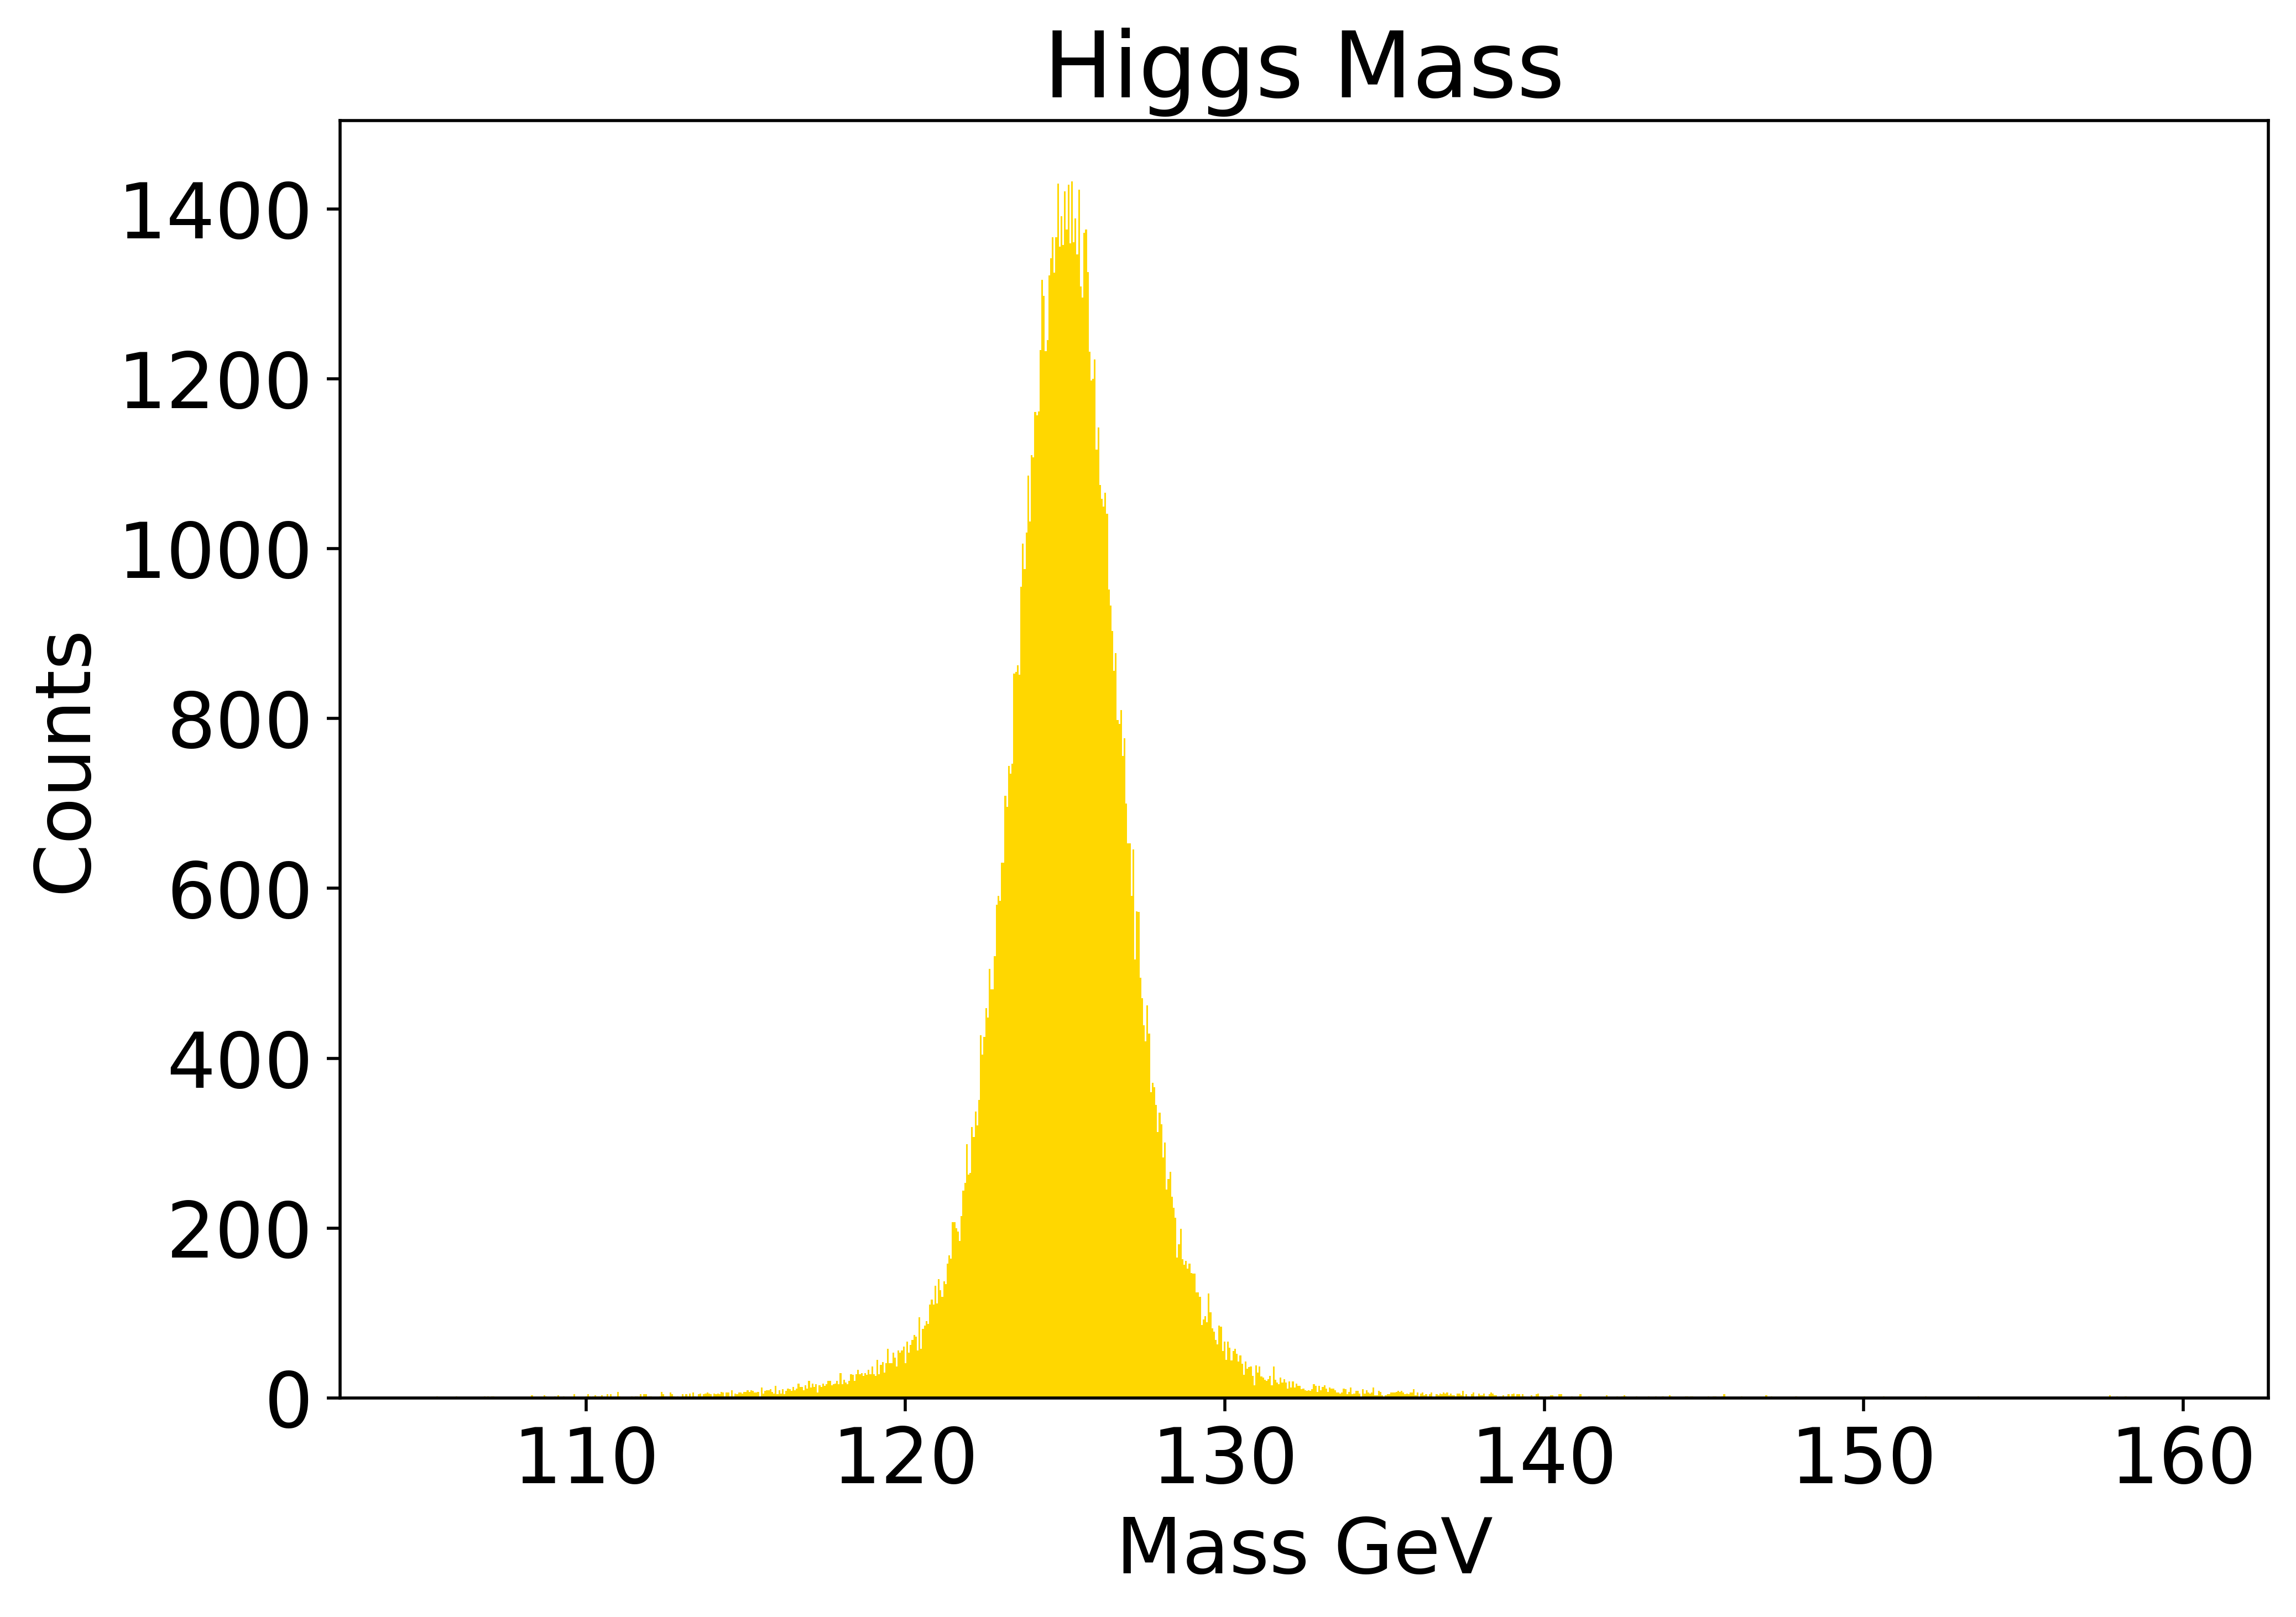

In [12]:
H_mass = []

for row in data.H_fom:
    H_mass.append(np.sqrt( row[0]**2 - row[1]**2 - row[2]**2 - row[3]**2 )/1000)

n, bins, patches = plt.hist(H_mass, bins = 1000, color = 'gold')
plt.xlabel('Mass GeV')
plt.ylabel('Counts')
plt.title('Higgs Mass');

In [13]:
arg = np.argmax(n)
print (bins[arg])

125.18663916866649


## Fitting mass dist.

In [14]:
H_array = np.array(H_mass)
vals1 = (115 < H_array)
H_array = H_array[vals1]
vals2 = (135 > H_array)
H_array = H_array[vals2]

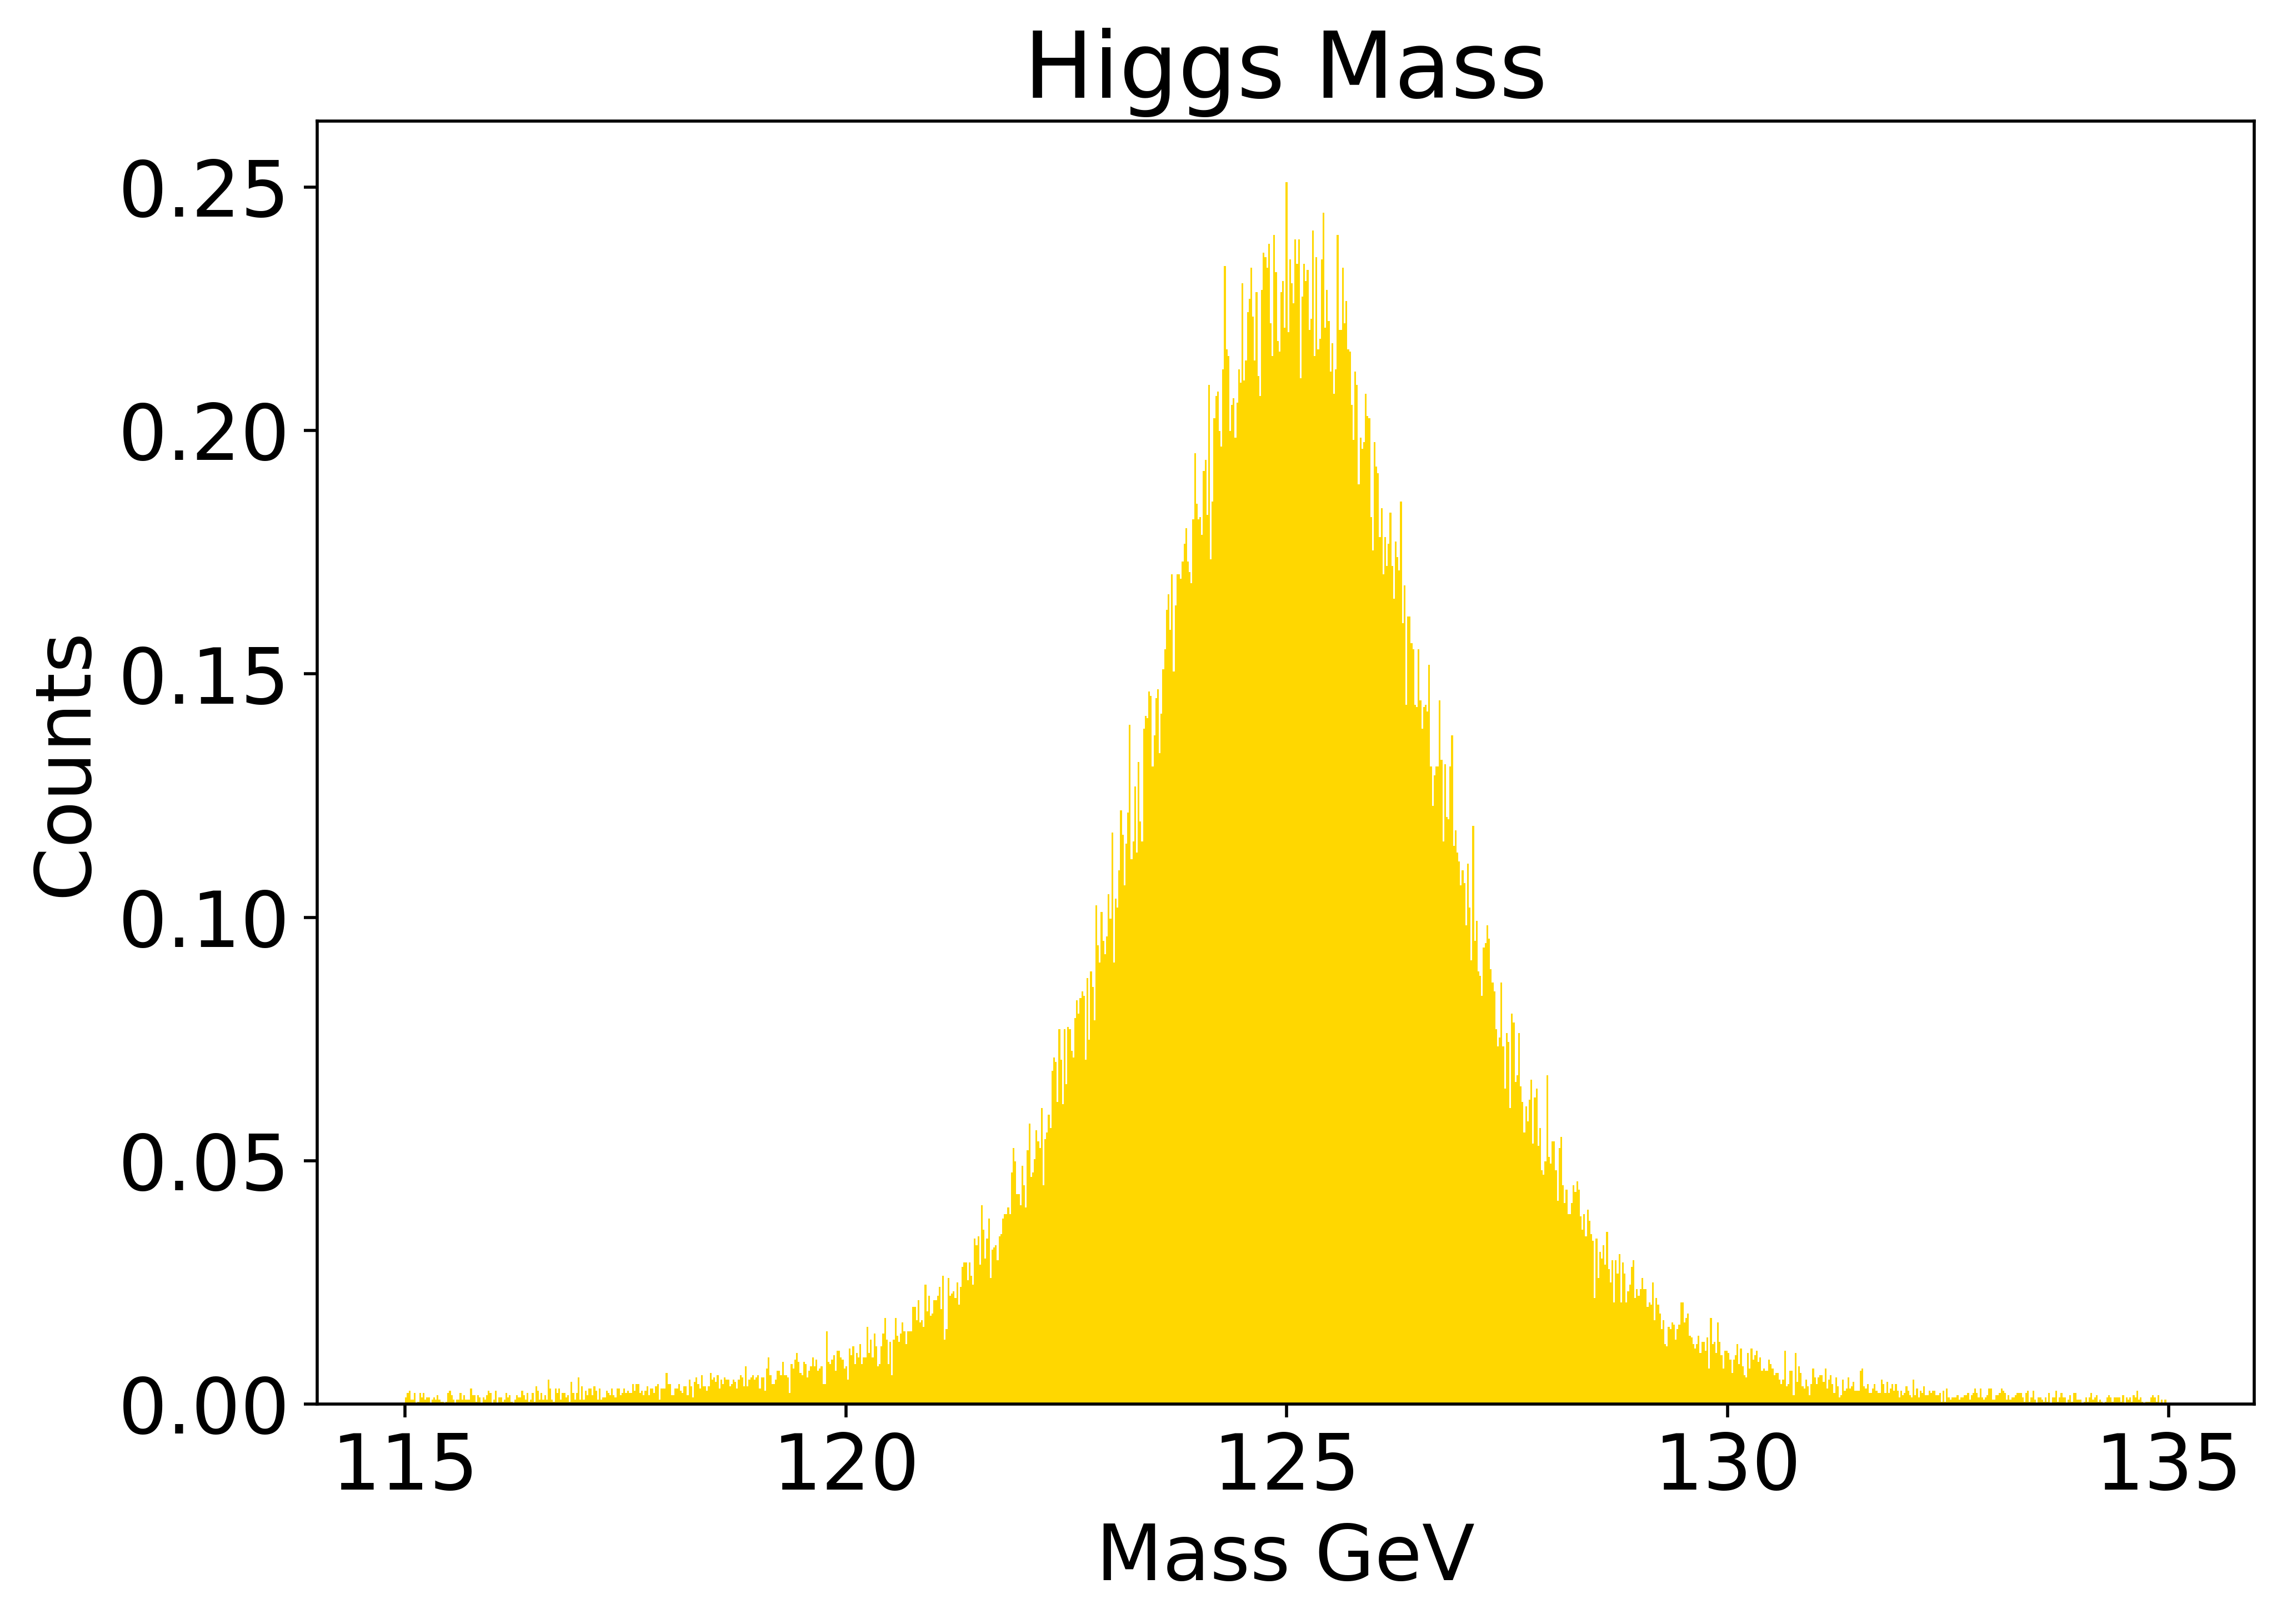

In [15]:
plt.hist(H_array, bins = 1000, color = 'gold', density = True)
plt.xlabel('Mass GeV')
plt.ylabel('Counts')
plt.title('Higgs Mass');

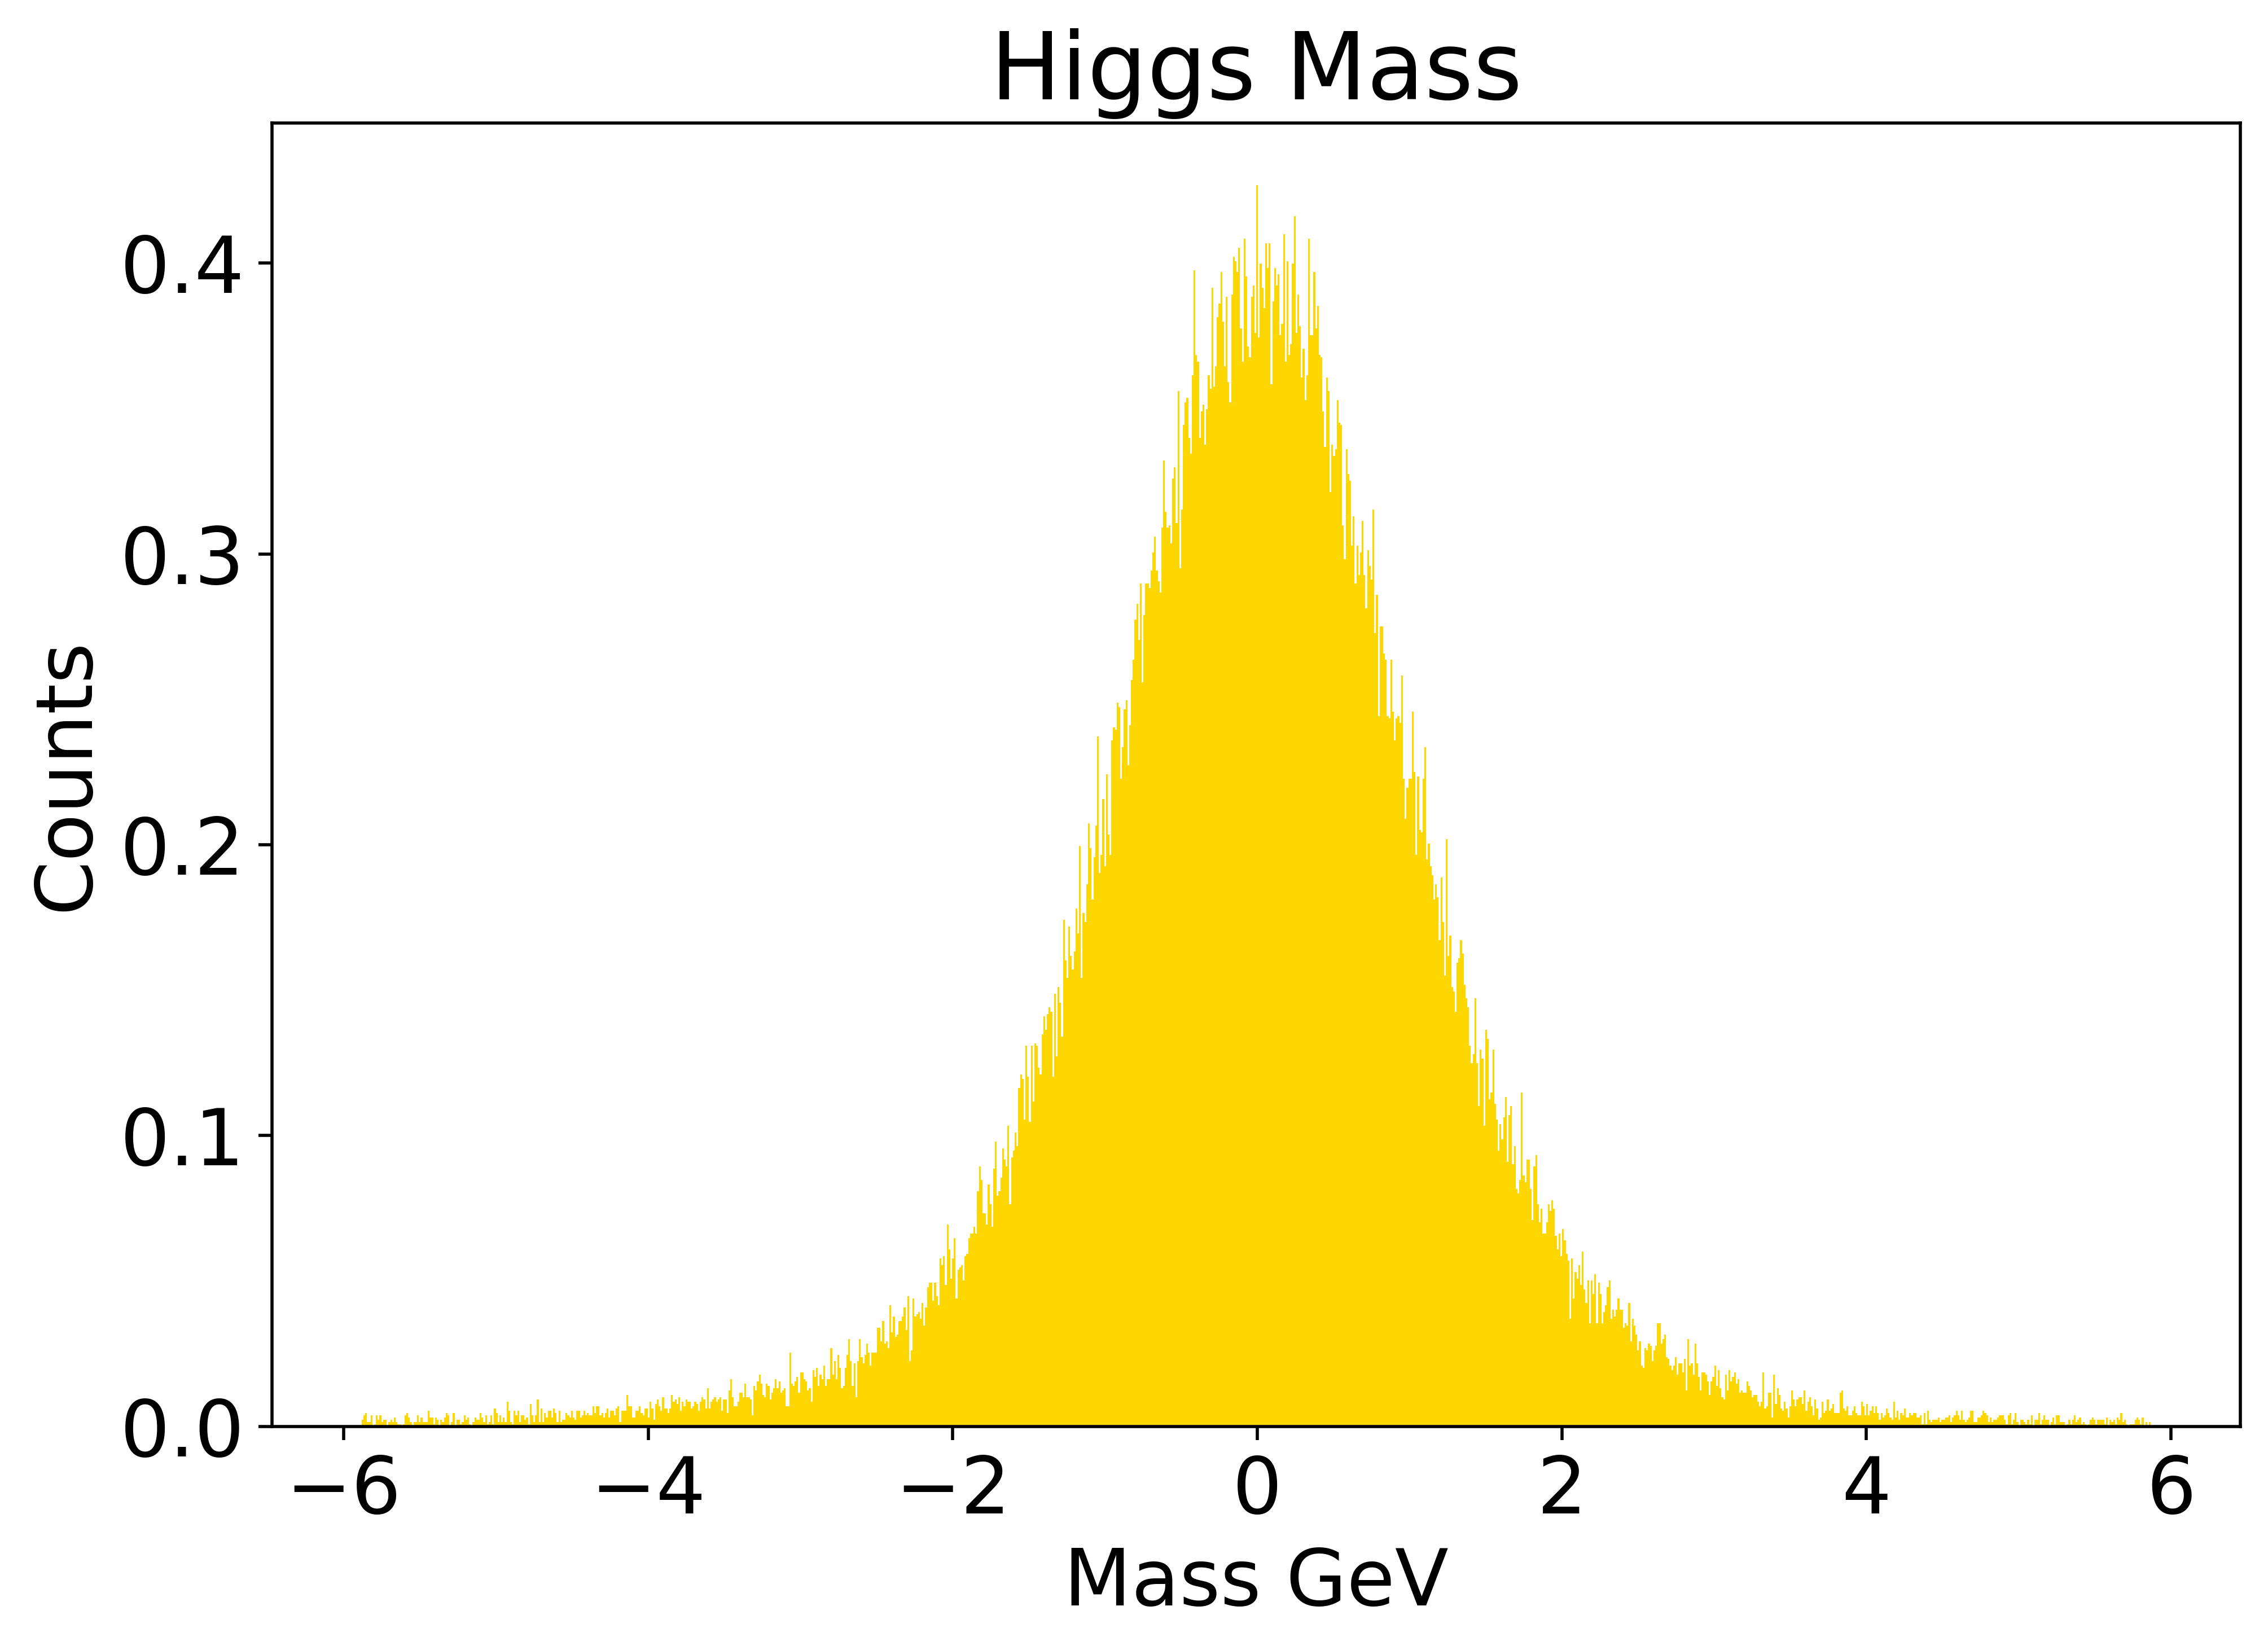

In [16]:
plt.hist((H_array-125)/1.7, bins = 1000, color = 'gold', density = True)
plt.xlabel('Mass GeV')
plt.ylabel('Counts')
plt.title('Higgs Mass');

In [17]:
def pdf_g(x, loc, sigma):
    
    """
    Pdf function describing 
    """

    gaussian = (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-(x-loc)**2 / (2*sigma**2))  


    return gaussian

In [18]:
def like_g(loc, sigma):
    
    """
    Likelihood function for the monte carlo fit
    """
    
    
    return -np.sum(np.log(pdf_g(H_array, loc, sigma)))

In [19]:
m_comb_g = Minuit(like_g, loc = 125, sigma = 0.5)

m_comb_g.migrad()  # run optimiser
m_comb_g.hesse()   # run covariance estimator

print(m_comb_g.values)  # print estimated values
print(m_comb_g.errors) 

<ValueView loc=125.02989779757705 sigma=2.115858696752131>
<ErrorView loc=0.009003409660633014 sigma=0.006366252099603032>


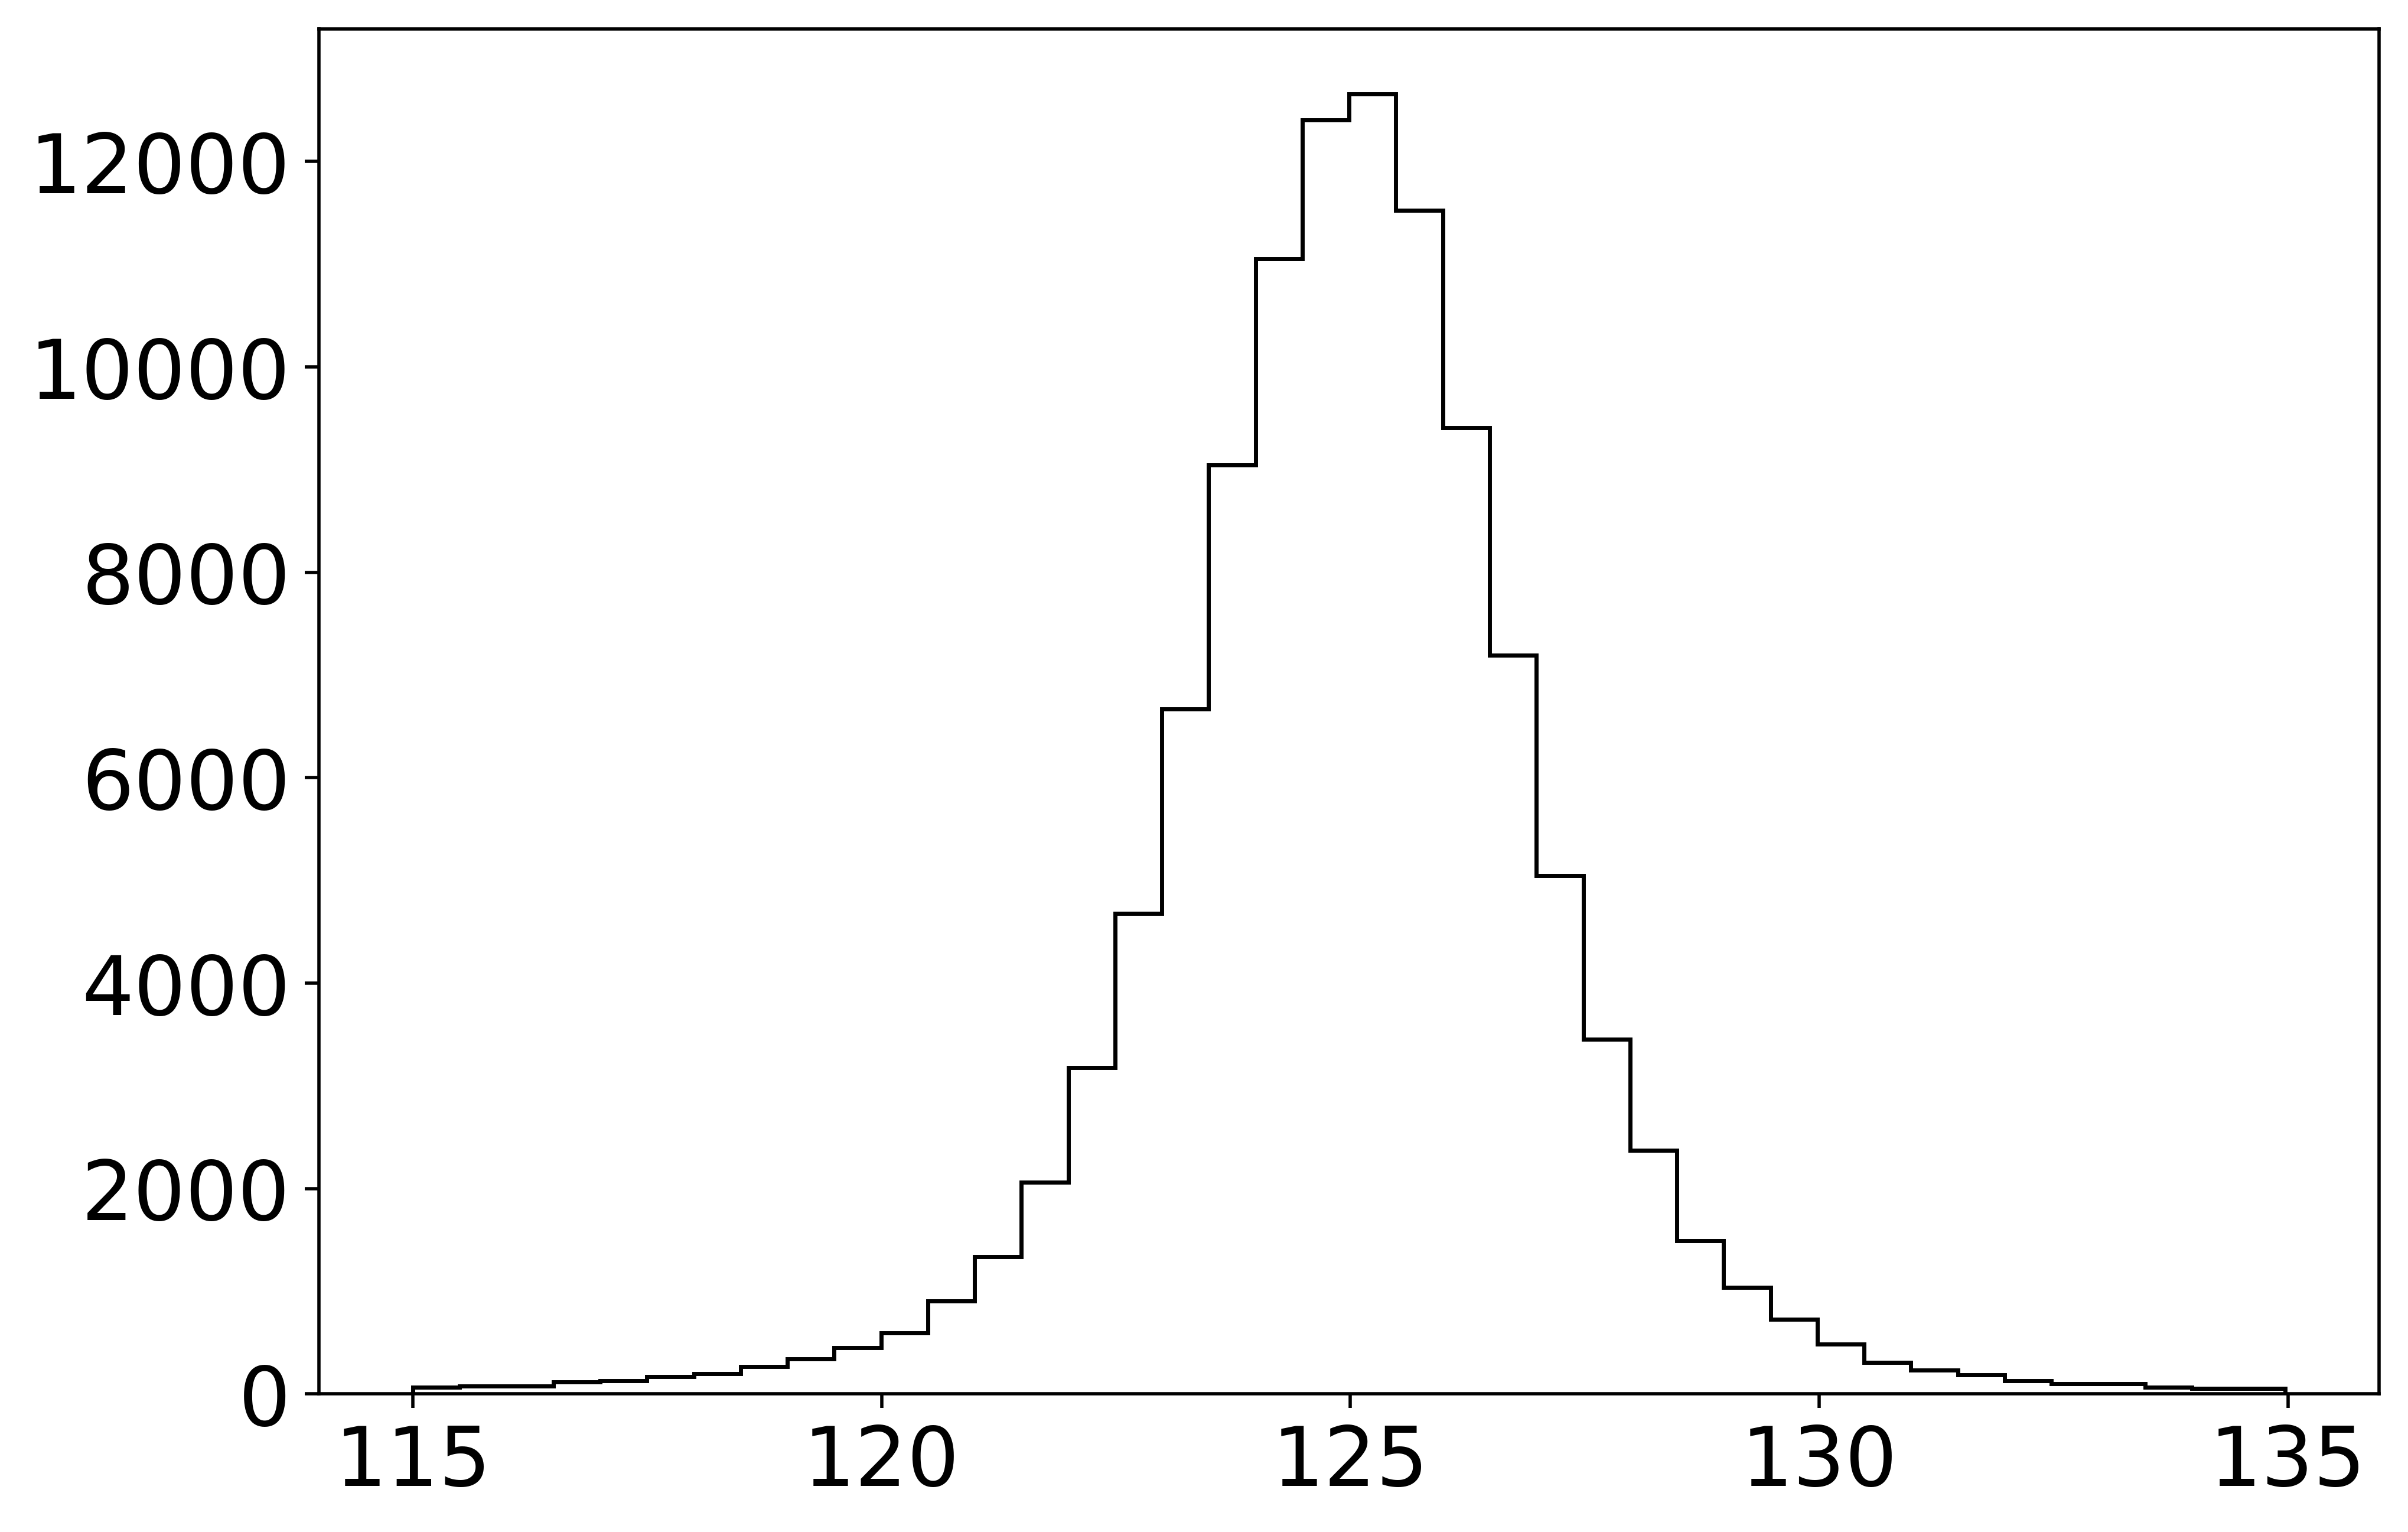

In [39]:
n, bins, patches = plt.hist(H_array, bins = 40, color = 'black', histtype=u'step');

55154.80290097402


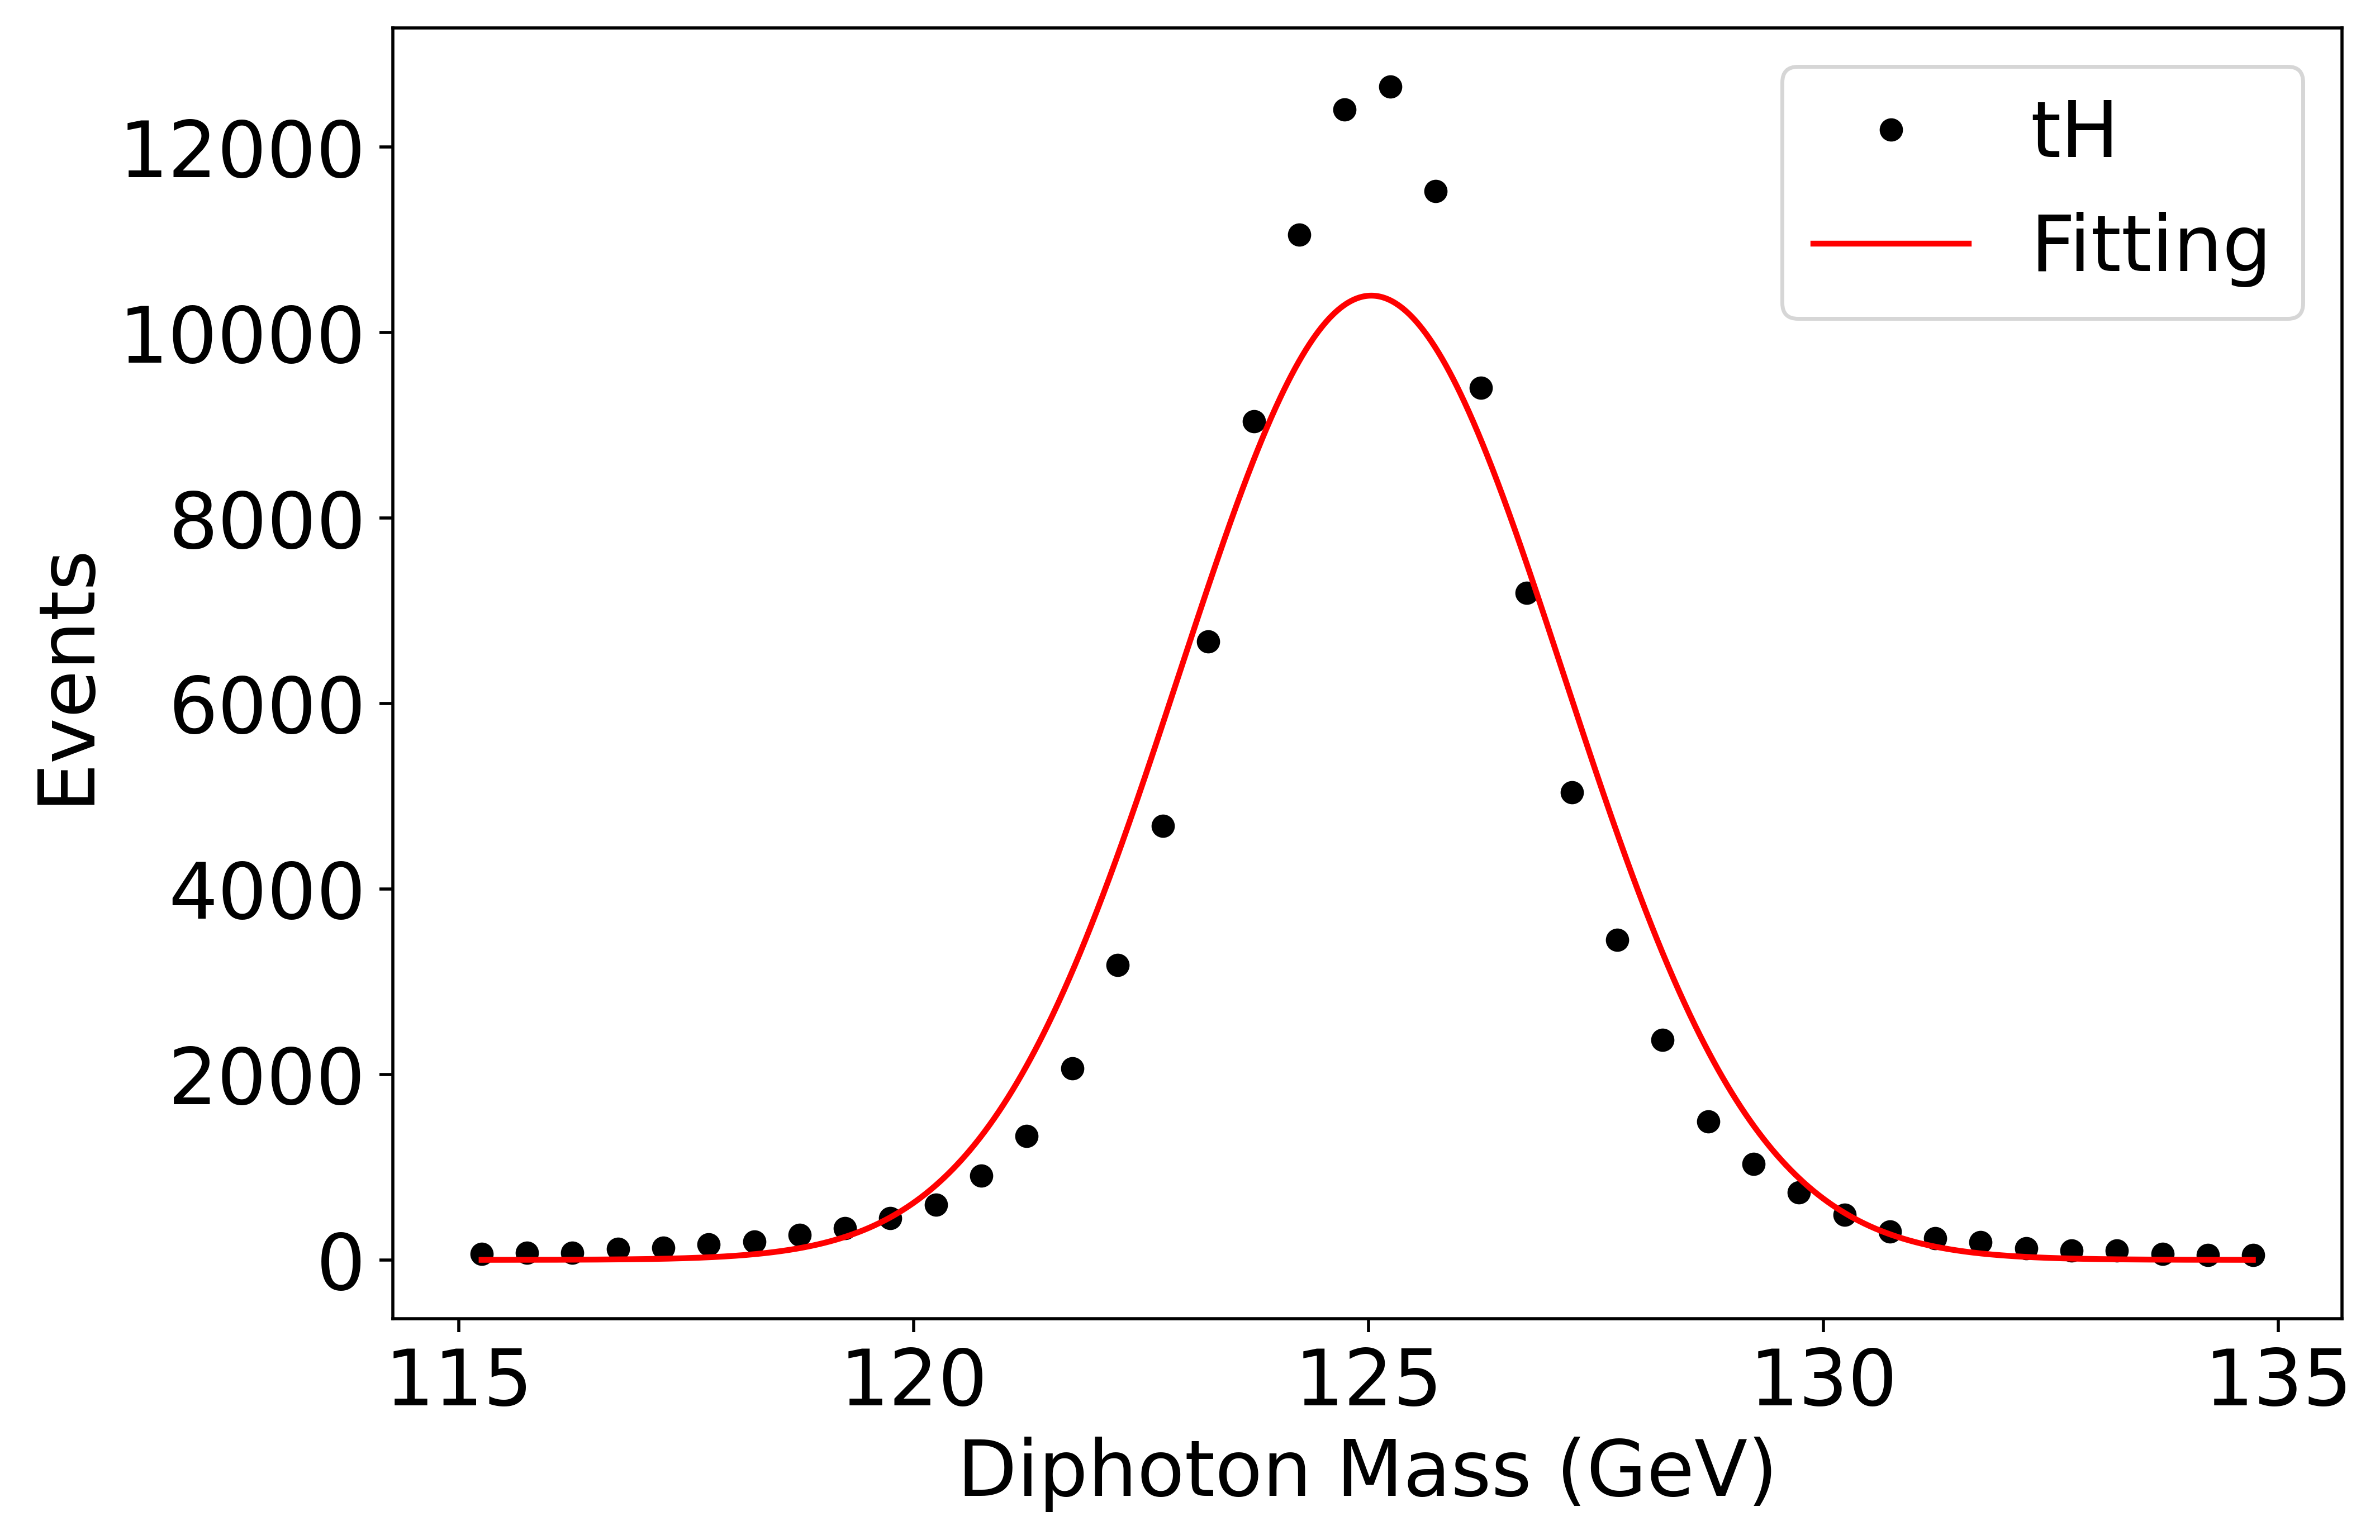

In [44]:
xcenters = (bins[:-1] + bins[1:]) / 2
scale = (bins[1] - bins[0])* sum(n)
print (scale)
x_array = np.arange(xcenters[0], xcenters[-1], 0.01)

plt.plot(xcenters, n, color = 'black', linestyle = '', marker = 'o', markersize = 5, label = 'tH')

#y = pdf_g(xcenters, *m_comb_g.values)
plt.plot(x_array, scale * pdf_g(x_array, *m_comb_g.values), color = 'red', label = 'Fitting')
plt.xlabel('Diphoton Mass (GeV)')
plt.ylabel('Events')
plt.legend();

In [29]:
def DSCB_int(x, mu_cb, s_cb, a_l, a_h, n_l, n_h):
    
    
    t = (x - mu_cb)/s_cb
    
    if (-a_l <= t) & (t <= a_h): 
       
        return np.exp(-0.5 * (t)**2)
        
    if (t < -a_l): 
        
        return np.exp(-0.5 * a_l**2) * ((a_l/n_l) * ((n_l/a_l) - a_l - t))**(-n_l)
        
    if (t > a_h): 
        
        return np.exp(-0.5 * a_h**2) * ((a_h/n_h) * ((n_h/a_h) - a_h + t))**(-n_h)
    
    else:
        return 0

In [30]:
def pdf_DSCB(myy, mu_cb, s_cb, a_l, n_l, a_h, n_h):
    
    #a_l = a_h = a
    #n_l = n_h = n
    
    
    def cb(x, mu_cb, s_cb, a_l, a_h, n_l, n_h):
        
        t = (x - mu_cb)/s_cb 
        y = t * 0


        #Guassian core 
        y[(-a_l <= t) & (t <= a_h)] = np.exp(-0.5 * (t[(-a_l <= t) & (t <= a_h)])**2)

        #lower tail 
        y[(t < -a_l)] = np.exp(-0.5 * a_l**2) * ((a_l/n_l) * ((n_l/a_l) - a_l - t[(t < -a_l)]))**(-n_l)

        #upper tail 
        y[(t > a_h)] = np.exp(-0.5 * a_h**2) * ((a_h/n_h) * ((n_h/a_h) - a_h + t[(t > a_h)]))**(-n_h)
        
        return y
    
    function = lambda x: DSCB_int(x, mu_cb, s_cb, a_l, a_h, n_l, n_h)
    
    area = integrate.quad(function, myy.min(), myy.max())[0]
    
    DSCB = cb(myy, mu_cb, s_cb, a_l, a_h, n_l, n_h)/area
    
    return DSCB
    

In [31]:
def like_DSCB(mu_cb, s_cb, a_l, n_l, a_h, n_h):
    
    return -np.sum(np.log(pdf_DSCB(H_array, mu_cb, s_cb, a_l, n_l, a_h, n_h)))

In [32]:
m_comb_DSCB = Minuit(like_DSCB, mu_cb = 125, s_cb = 1.74, a_l = 1.7, n_l = 2, a_h = 1.7, n_h = 1.7)

m_comb_DSCB.migrad()  # run optimiser
m_comb_DSCB.hesse()   # run covariance estimator

print(m_comb_DSCB.values)  # print estimated values
print(m_comb_DSCB.errors) 

<ValueView mu_cb=125.03562717287977 s_cb=1.641953414659304 a_l=1.5633459305399353 n_l=4.552721531175962 a_h=1.4358665705748406 n_h=8.768059830469596>
<ErrorView mu_cb=0.009595588924064235 s_cb=0.01010936945940329 a_l=0.03934215452848685 n_l=0.47352519825597583 a_h=0.031956178946398614 n_h=1.267271684063007>


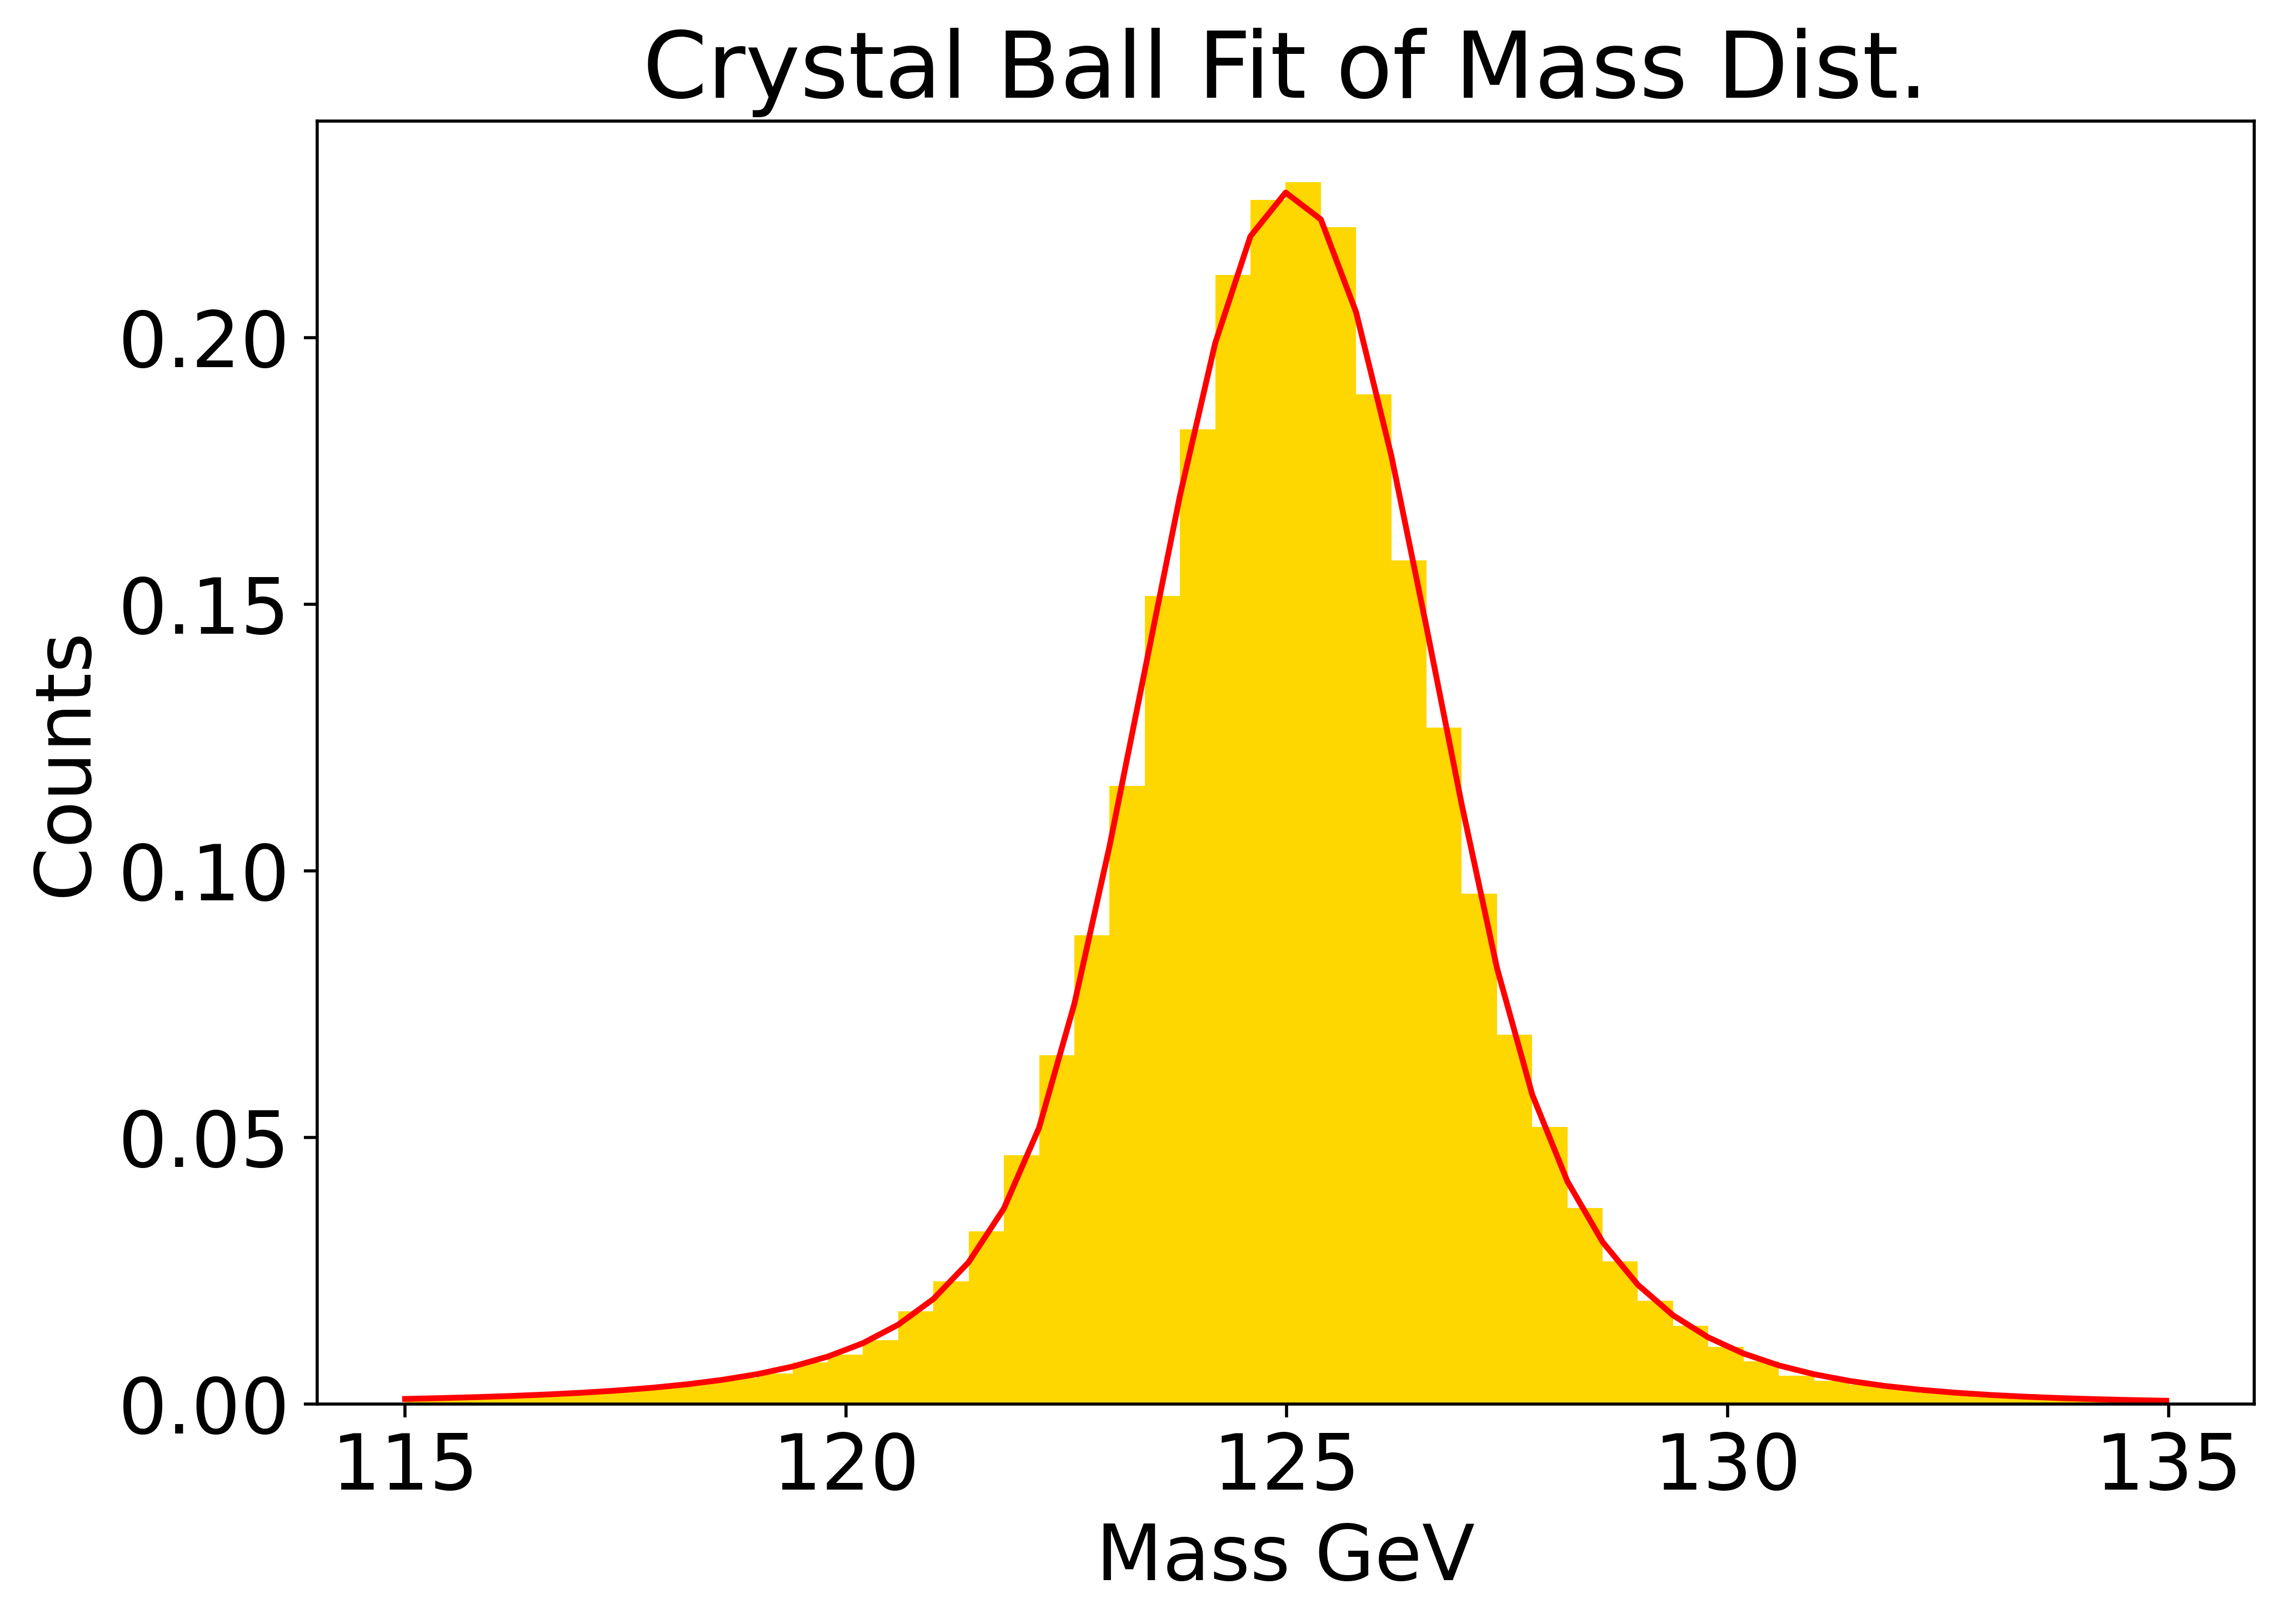

In [33]:
n_DSCB, bins_DSCB, patches_DSCB = plt.hist(H_array, bins = 50, color = 'gold', density = True);

x_DSCB = bins_DSCB
y_DSCB = pdf_DSCB(x_DSCB, *m_comb_DSCB.values)



plt.plot(x_DSCB, y_DSCB, 'red')
plt.xlabel('Mass GeV')
plt.ylabel('Counts')
plt.title('Crystal Ball Fit of Mass Dist.');

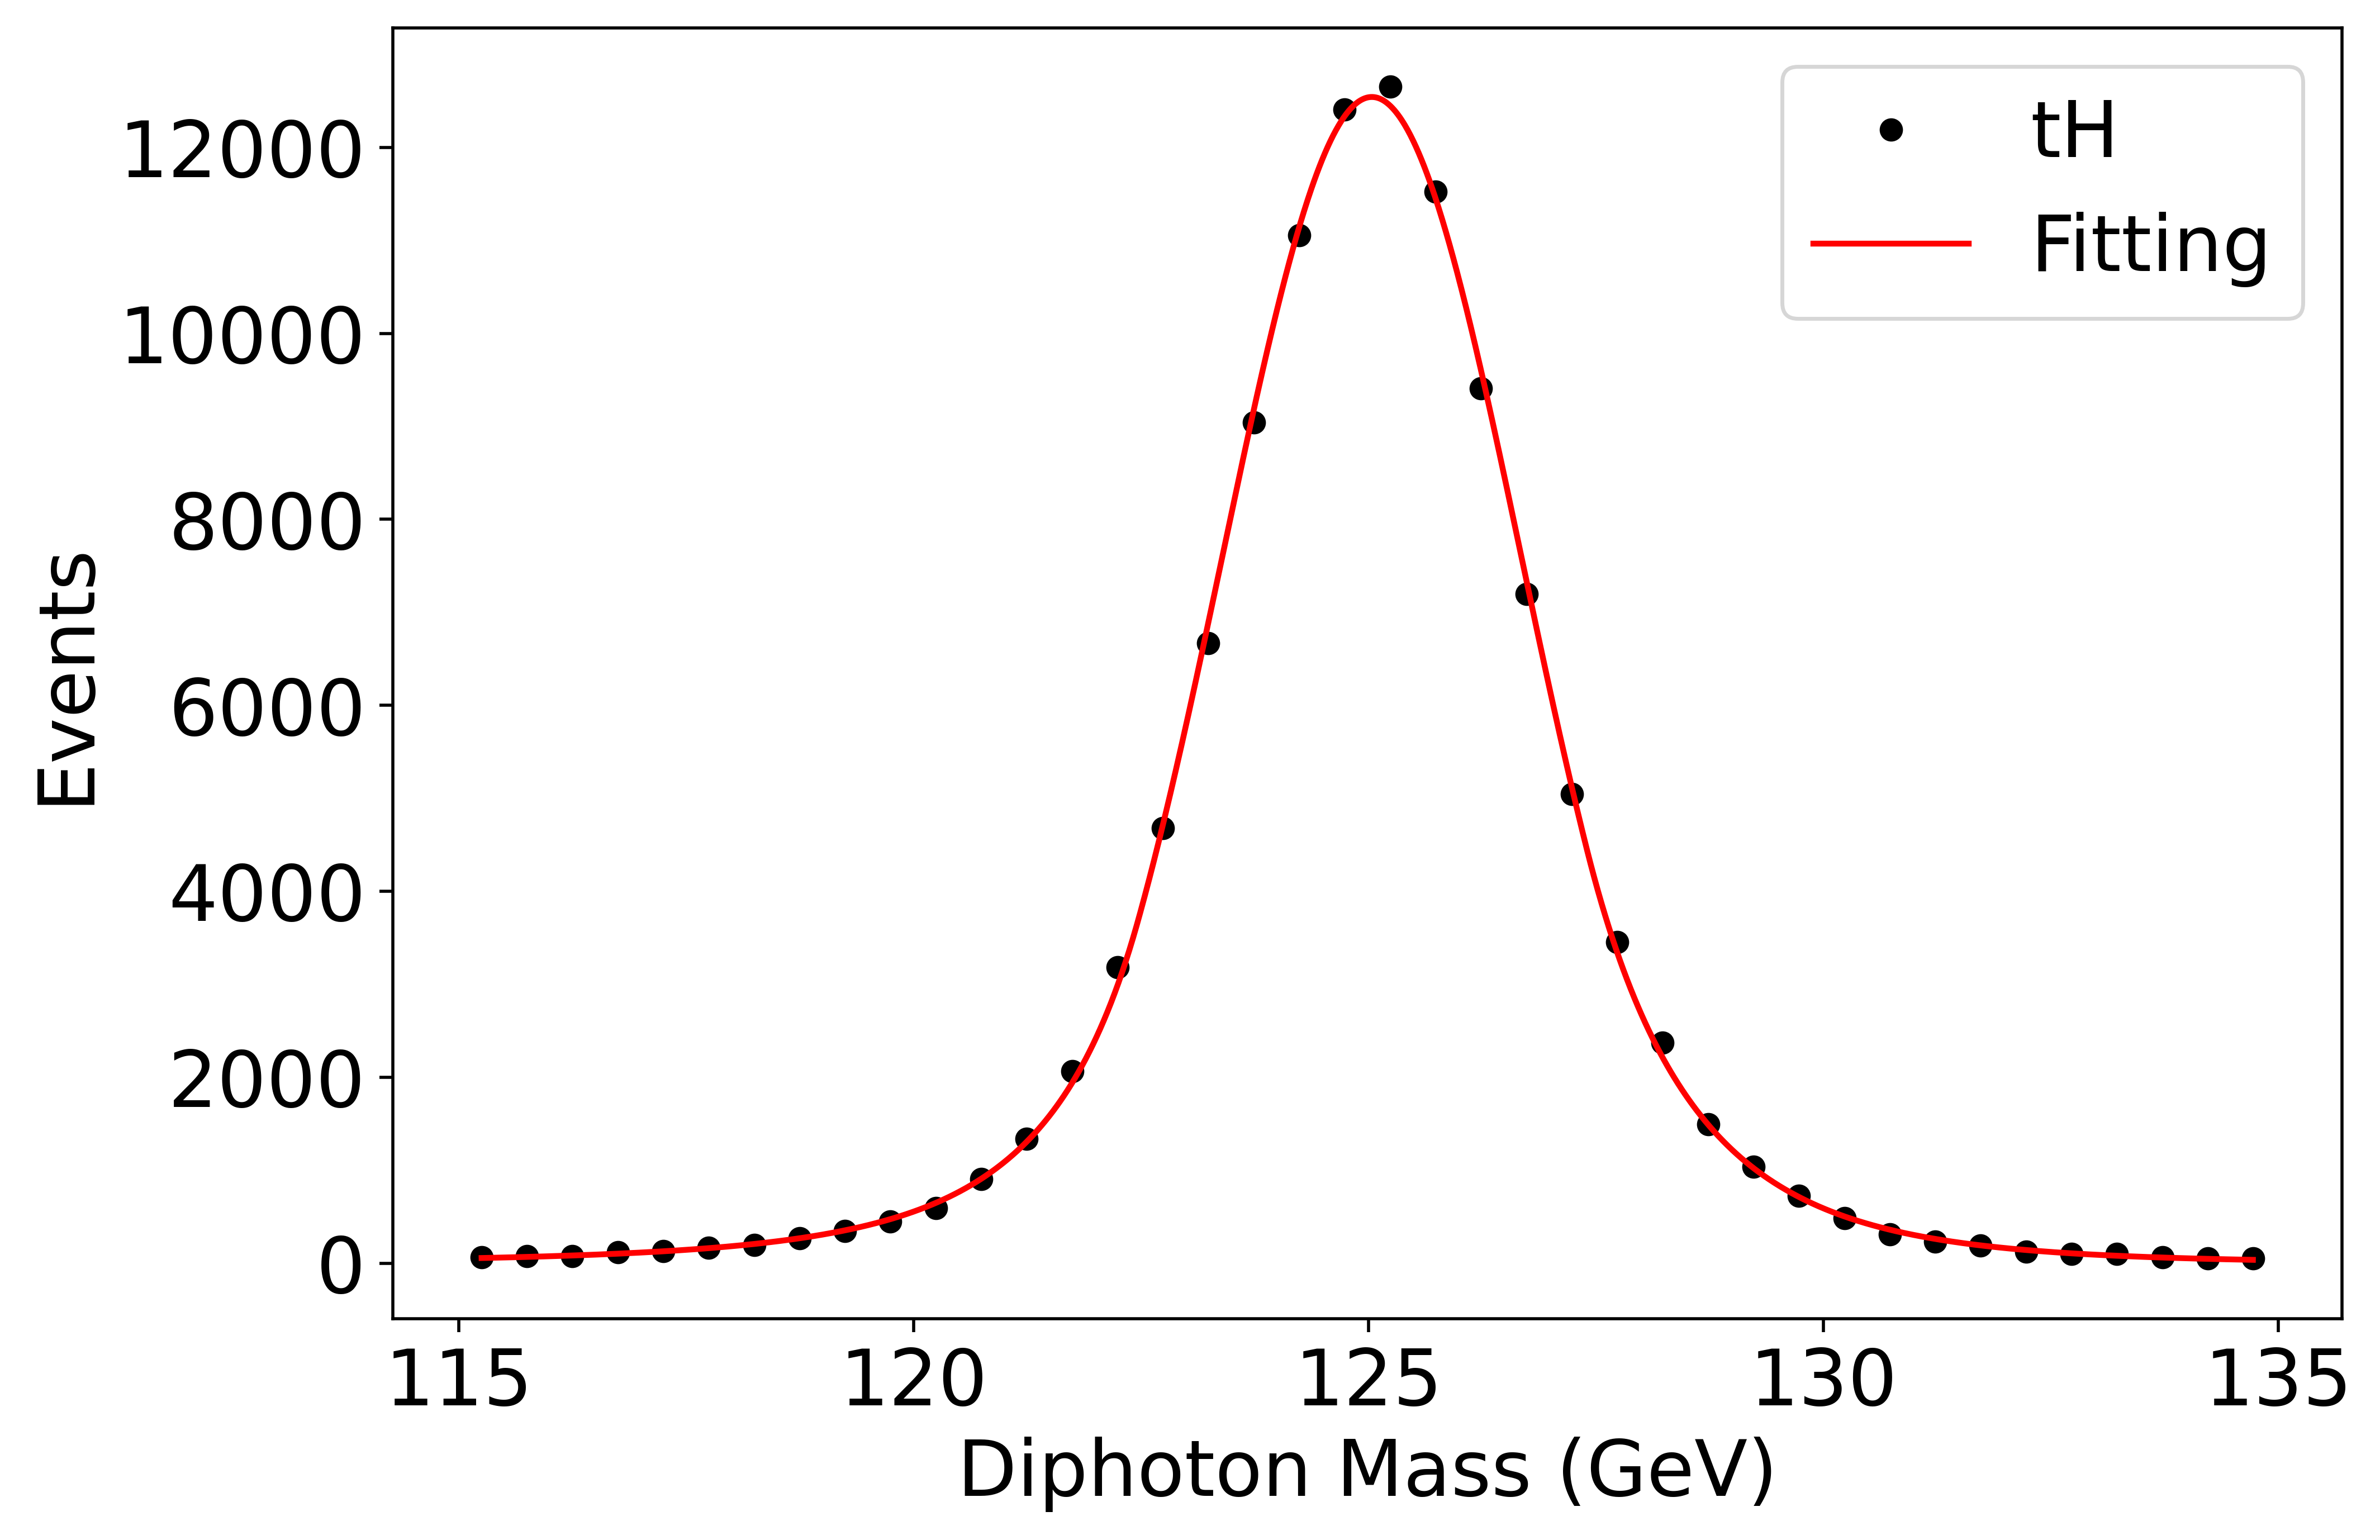

In [45]:
xcenters = (bins[:-1] + bins[1:]) / 2
scale = (bins[1] - bins[0])* sum(n)

x_array = np.arange(xcenters[0], xcenters[-1], 0.01)

plt.plot(xcenters, n, color = 'black', linestyle = '', marker = 'o', markersize = 5, label = 'tH')

#y = pdf_DSCB(xcenters, *m_comb_DSCB.values)
plt.plot(x_array, scale * pdf_DSCB(x_array, *m_comb_DSCB.values), color = 'red', label = 'Fitting')
plt.xlabel('Diphoton Mass (GeV)')
plt.ylabel('Events')
plt.legend();

In [40]:
print (integrate.trapz(y_DSCB, x_DSCB))

1.0000101686798883


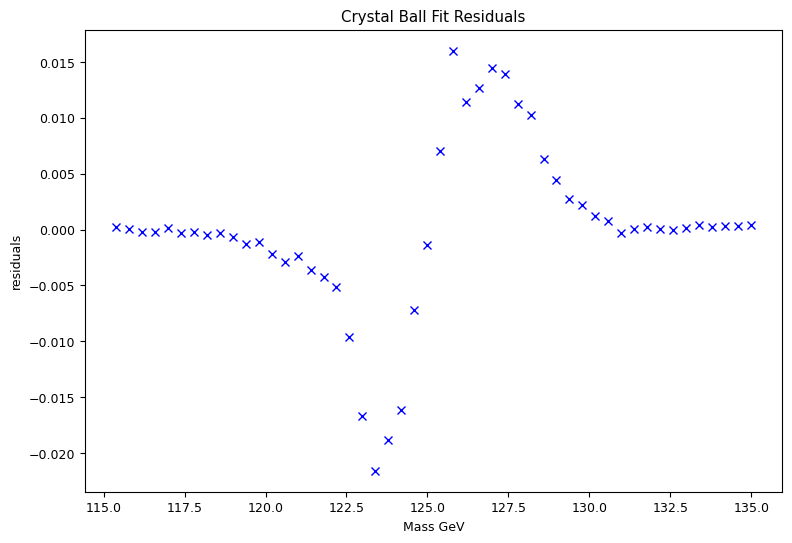

In [41]:
residuals = n_DSCB - y_DSCB[1:]

plt.plot(x_DSCB[1:], residuals, 'bx')
plt.title('Crystal Ball Fit Residuals')
plt.xlabel('Mass GeV')
plt.ylabel('residuals');

In [42]:
def pdf_G_CB(myy, mu_cb, s_cb, a_l, n_l, a_h, n_h, sigma, F):
    
    #a_l = a_h = a
    #n_l = n_h = n
    
    
    def cb(x, mu_cb, s_cb, a_l, a_h, n_l, n_h):
        
        t = (x - mu_cb)/s_cb 
        y = t * 0


        #Guassian core 
        y[(-a_l <= t) & (t <= a_h)] = np.exp(-0.5 * (t[(-a_l <= t) & (t <= a_h)])**2)

        #lower tail 
        y[(t < -a_l)] = np.exp(-0.5 * a_l**2) * ((a_l/n_l) * ((n_l/a_l) - a_l - t[(t < -a_l)]))**(-n_l)

        #upper tail 
        y[(t > a_h)] = np.exp(-0.5 * a_h**2) * ((a_h/n_h) * ((n_h/a_h) - a_h + t[(t > a_h)]))**(-n_h)
        
        return y
    
    function = lambda x: DSCB_int(x, mu_cb, s_cb, a_l, a_h, n_l, n_h)
    
    area = integrate.quad(function, myy.min(), myy.max())[0]
    
    DSCB = cb(myy, mu_cb, s_cb, a_l, a_h, n_l, n_h)/area
    
    
    
    
    loc = mu_cb
    
    gaussian = (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-(myy-loc)**2 / (2*sigma**2))  
    
    
    
    
    return F * DSCB + (1.0-F)*gaussian
    

In [43]:
def like_G_CB(mu_cb, s_cb, a_l, n_l, a_h, n_h, sigma, F):
    
    return -np.sum(np.log(pdf_G_CB(H_array, mu_cb, s_cb, a_l, n_l, a_h, n_h, sigma, F)))

In [44]:
m_comb_full = Minuit(like_G_CB, mu_cb = 125, s_cb = 1.74, a_l = 1.7, n_l = 2, a_h = 1.7, n_h = 1.7, sigma = 1, F = 0.6)

m_comb_full.limits['F'] = (0.01, 0.99)

m_comb_full.migrad()  # run optimiser
m_comb_full.hesse()   # run covariance estimator

print(m_comb_full.values)  # print estimated values
print(m_comb_full.errors) 

<ValueView mu_cb=125.04720430233036 s_cb=2.594640044935326 a_l=1.7722501661319972 n_l=3.231596361704513 a_h=2.037652283920466 n_h=2.327334596746756 sigma=1.3946298124325998 F=0.4058761810550173>
<ErrorView mu_cb=0.008193348072009684 s_cb=0.14431197785017005 a_l=0.09301633945633761 n_l=1.0590225488687048 a_h=0.1377615249937537 n_h=1.120917837310925 sigma=0.0418845142853352 F=0.054768198196639056>


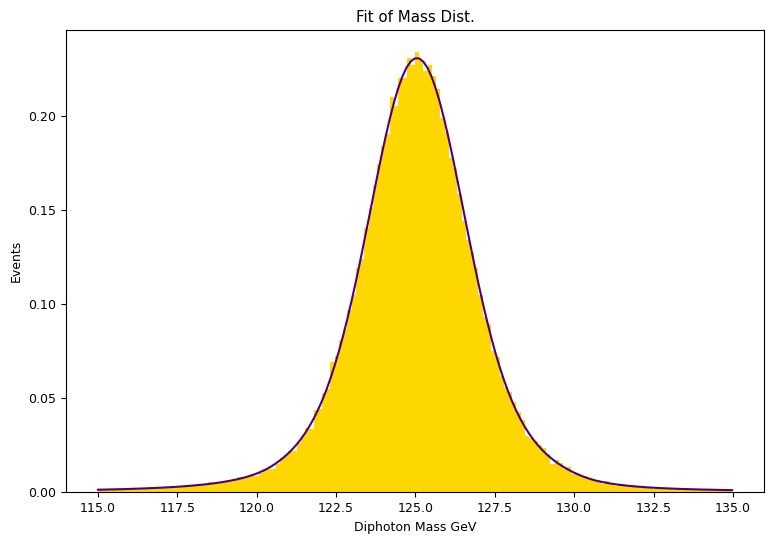

In [56]:
n_full, bins_full, patches_full = plt.hist(H_array, bins = 150, color = 'gold', density = True)#, histtype=u'step');

x_full = bins_full
y_full = pdf_G_CB(x_full, *m_comb_full.values)



plt.plot(x_full, y_full, 'indigo')
plt.xlabel('Diphoton Mass GeV')
plt.ylabel('Events')
plt.title('Fit of Mass Dist.');

In [46]:
print (integrate.trapz(y_full, x_full))

0.9999975998237953


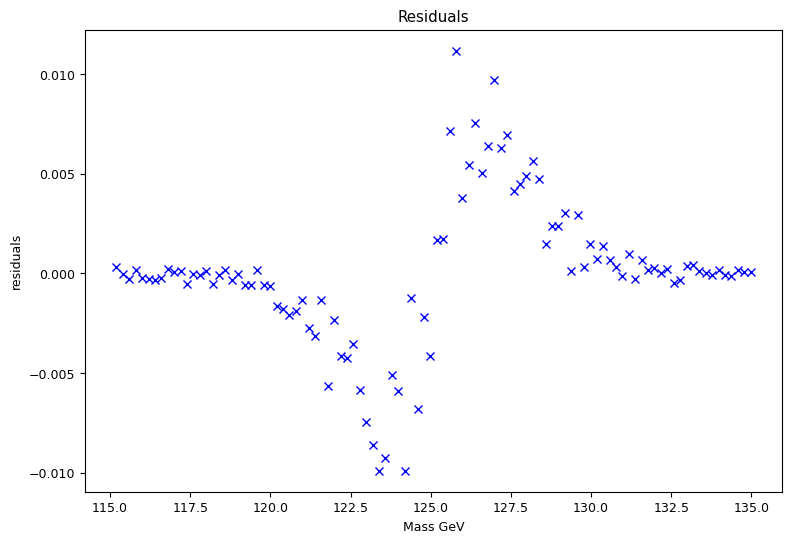

In [47]:
resi = n_full - y_full[1:]

plt.plot(x_full[1:], resi, 'bx')
plt.title('Residuals')
plt.xlabel('Mass GeV')
plt.ylabel('residuals');